# Personal Data
Please fill in your details below to help us keep track of your submission.

Student Name: `Fatemeh Hamdi`

Student ID: `401105848`

# Linear Discriminant Analysis

Linear Discriminant Analysis (LDA) is a classification and dimensionality reduction method to find a linear combination of features which are used to separate two or more classes.

In this assignment, you will implement a LDA class from scratch and use it to find the bounderies to separate two and more classes.

# Classification on Two classes (65 points)
# Step 1: Data Exploration
The dataset which is used in this part is several game result predictor which are independent variables and one target, dependent variable, called : `win_or_defeat`.

Note that in the cells where you need to display a chart, it is not necessary to follow the exact style of the chart.

In [1]:
!pip install typing-extensions --upgrade
!pip install ydata-profiling
!pip install gdown

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.7/395.7 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 26.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=a1ff13d5ee129877854b91995c80489a0c1cdd76a0b0181e1aad29defabbe99e
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from scipy.linalg import eigh as sp_eigh
from sklearn.feature_selection import mutual_info_classif, RFE

### First, download the dataset.

In [3]:
!gdown 1SGuWqcRJ1GvPO9RxzxjOAkCEN_RDJY9d
!wget -O dataset.csv "https://drive.google.com/file/d/1SGuWqcRJ1GvPO9RxzxjOAkCEN_RDJY9d/view?usp=sharing"

Downloading...
From: https://drive.google.com/uc?id=1SGuWqcRJ1GvPO9RxzxjOAkCEN_RDJY9d
To: /content/train.csv
100% 493k/493k [00:00<00:00, 8.63MB/s]
--2025-03-24 09:48:22--  https://drive.google.com/file/d/1SGuWqcRJ1GvPO9RxzxjOAkCEN_RDJY9d/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 172.217.0.78, 2607:f8b0:4025:810::200e
Connecting to drive.google.com (drive.google.com)|172.217.0.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘dataset.csv’

dataset.csv             [ <=>                ]  90.33K  --.-KB/s    in 0.02s   

2025-03-24 09:48:22 (4.68 MB/s) - ‘dataset.csv’ saved [92493]



Load the dataset as a dataframe. Then do the following. (5 points)
- Drop datas with null values.
- Do duplicate detection and drop them.
- Report Kurtosis.
- Report Interquartile range (IQR).
- Display the first 10 rows.
- Search and read about ydata-profiling, apply it to data and save the result in "report.html".

In [9]:
# Load the dataset as a pandas dataframe
import pandas as pd
df = pd.read_csv('train.csv')  # Using the file downloaded by gdown

# Drop rows with null values from the dataframe
df = df.dropna()

# Detect and drop duplicate rows from the dataframe
df = df.drop_duplicates()

# Calculate and print the kurtosis of the dataframe (numeric columns only)
kurtosis = df.select_dtypes(include=['int64', 'float64']).kurtosis()
print("Kurtosis:\n", kurtosis)

# Select only numeric columns (int and float64) from the dataframe
non_obj = df.select_dtypes(include=['int64', 'float64'])

# Calculate the Interquartile Range (IQR) for the numeric columns
q3 = non_obj.quantile(0.75)
q1 = non_obj.quantile(0.25)
print("\nInterquartile Range (IQR):\n", q3 - q1)

# Display the first 10 rows of the dataframe
print("\nFirst 10 rows:")
df.head(10)

# Generate a profile report for the dataframe and save it as "report.html"
from ydata_profiling import ProfileReport
report = ProfileReport(df, title='Data Profiling Report')
report.to_file("report.html")

Kurtosis:
 Unnamed: 0              -1.199976
spell_used              -0.771228
trap_used               -1.560519
assists                  1.796163
damage_amount           20.631801
towers_damage            3.060186
rooms_damage            20.631801
deaths                   0.372563
money_total              0.326406
kill_death_ratio         9.973199
kills_total              1.438422
level                   -0.384155
controlling_time        11.943538
total_damage             0.696798
earned_damage            1.792284
special_enemy_killed    -1.157044
room_kills               2.527769
main_score               3.950108
dtype: float64

Interquartile Range (IQR):
 Unnamed: 0               2306.0
spell_used                  7.0
trap_used                   8.0
assists                     7.0
damage_amount            3349.0
towers_damage           11356.0
rooms_damage             3349.0
deaths                      5.0
money_total              4738.0
kill_death_ratio            3.2
kills_total  

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 22/22 [00:00<00:00, 57.69it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### For any column which is numerical print mean, standard deviation, maximum and minimum values. (3 points)

In [10]:
# Select only numerical columns (int and float)
numerical_cols = df.select_dtypes(include=['int64', 'float64'])

# Calculate statistics
mean_values = numerical_cols.mean()
std_values = numerical_cols.std()
max_values = numerical_cols.max()
min_values = numerical_cols.min()

# Print the results
print("mean values:----------------------------------")
print(mean_values)
print("\nstd values:----------------------------------")
print(std_values)
print("\nmax values:-----------------------------------")
print(max_values)
print("\nmin values:-----------------------------------")
print(min_values)

mean values:----------------------------------
Unnamed: 0                2308.996098
spell_used                   6.707782
trap_used                    8.430739
assists                      8.189031
damage_amount             2639.487752
towers_damage             9382.315847
rooms_damage              2639.487752
deaths                       5.740733
money_total              10865.129850
kill_death_ratio             3.602712
kills_total                  5.702580
level                       13.826794
controlling_time            18.926295
total_damage            117652.268806
earned_damage            21465.087145
special_enemy_killed       120.789725
room_kills                   1.032517
main_score                  30.158899
dtype: float64

std values:----------------------------------
Unnamed: 0               1331.809470
spell_used                  3.976734
trap_used                   4.312468
assists                     5.639756
damage_amount            3194.783198
towers_damage         

### Print number of unique values for `location` column. (2 points)

In [11]:
# Print number of unique values for location column
location_counts = df['location'].value_counts()
print(location_counts)

location
Lane.jungle      978
Lane.top_lane    955
Lane.mid_lane    913
Lane.bot_lane    902
Lane.utility     865
Name: count, dtype: int64


### Show correlation matrix. (3 points)

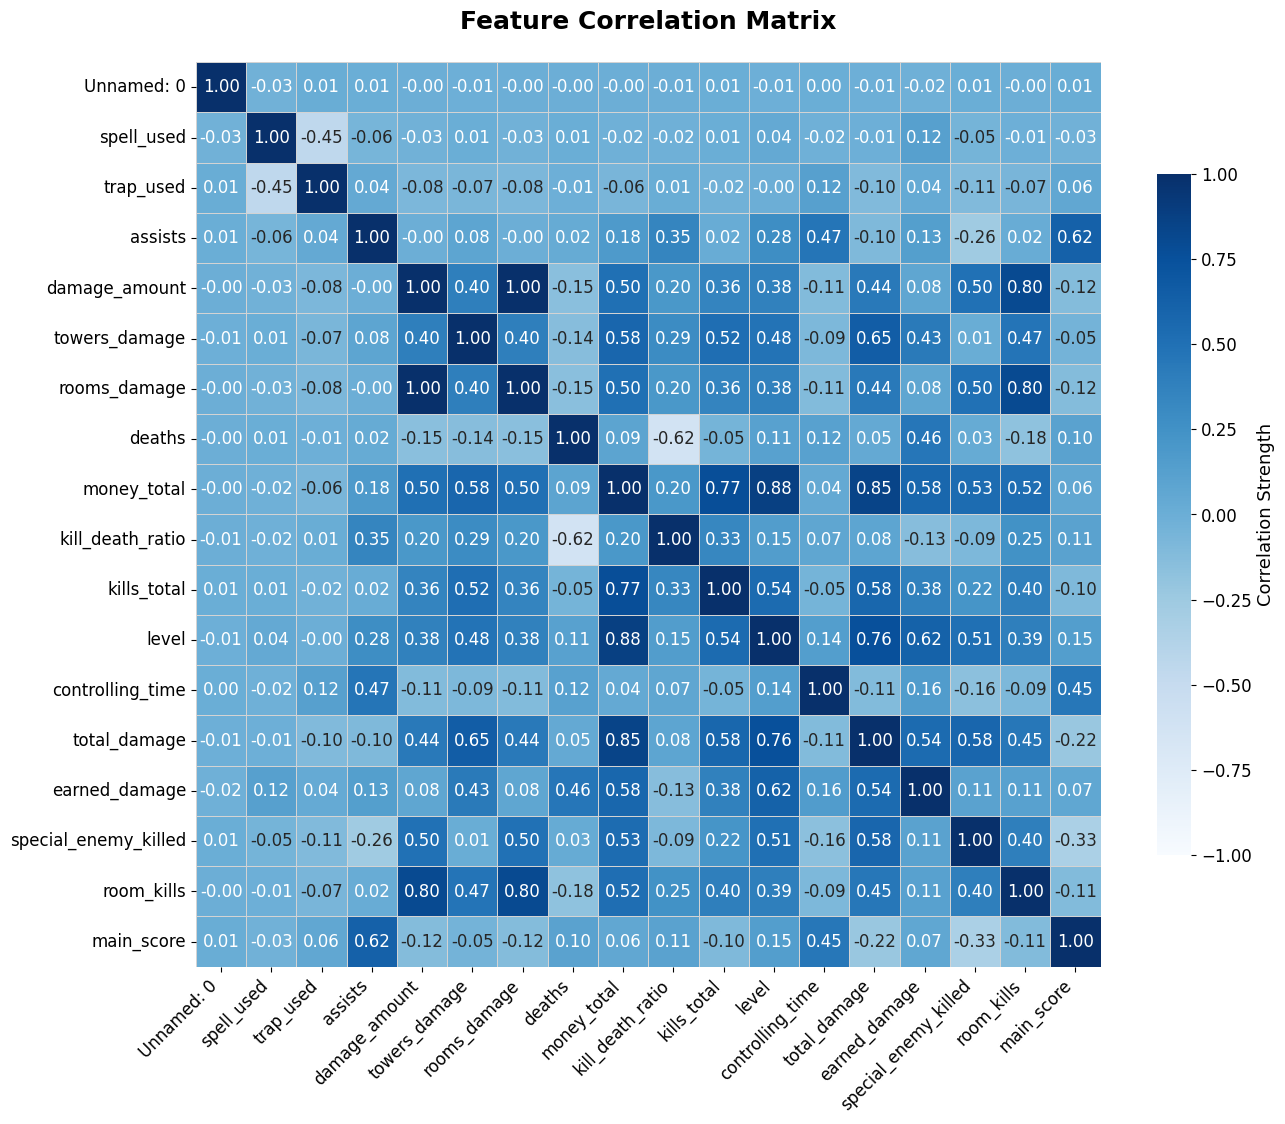

In [16]:
plt.figure(figsize=(14, 12))  # Larger figure size

# Create heatmap with adjusted cell size
heatmap = sns.heatmap(correlation_matrix,
            annot=True,
            fmt=".2f",
            cmap='Blues',
            center=0,
            linewidths=0.5,
            linecolor='lightgray',
            square=True,
            cbar_kws={'shrink': 0.7, 'label': 'Correlation'},
            annot_kws={'size': 12},  # Larger annotation text
            vmin=-1,  # Ensure full color range
            vmax=1)

# Force perfect square cells
heatmap.set_aspect("equal")

# Adjust cell size by modifying the figure dimensions
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=12)

# Title and formatting
plt.title("Feature Correlation Matrix",
         fontsize=18,
         pad=24,
         fontweight='bold')

# Add padding around the heatmap
plt.tight_layout(pad=3)

# Custom colorbar position
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Correlation Strength', fontsize=13)

plt.show()

### Plot barplot of combined `position` and `location`. (3 points)
Position on x axis and location on legend.

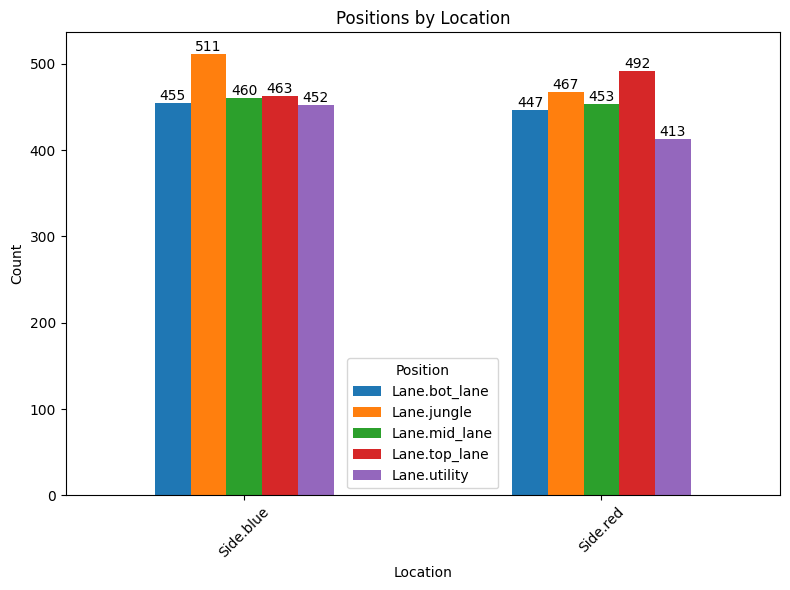

In [34]:
grouped_df = df.groupby(['position', 'location']).size().reset_index(name='count')
pivot_df = grouped_df.pivot(index='position', columns='location', values='count')
ax = pivot_df.plot(kind='bar', figsize=(8, 6))

plt.title('Positions by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Position')
plt.tight_layout()

# Add values on top of bars
for p in ax.patches:
    ax.annotate(str(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.show()

### Plor pie chart for `level`. (3 points)


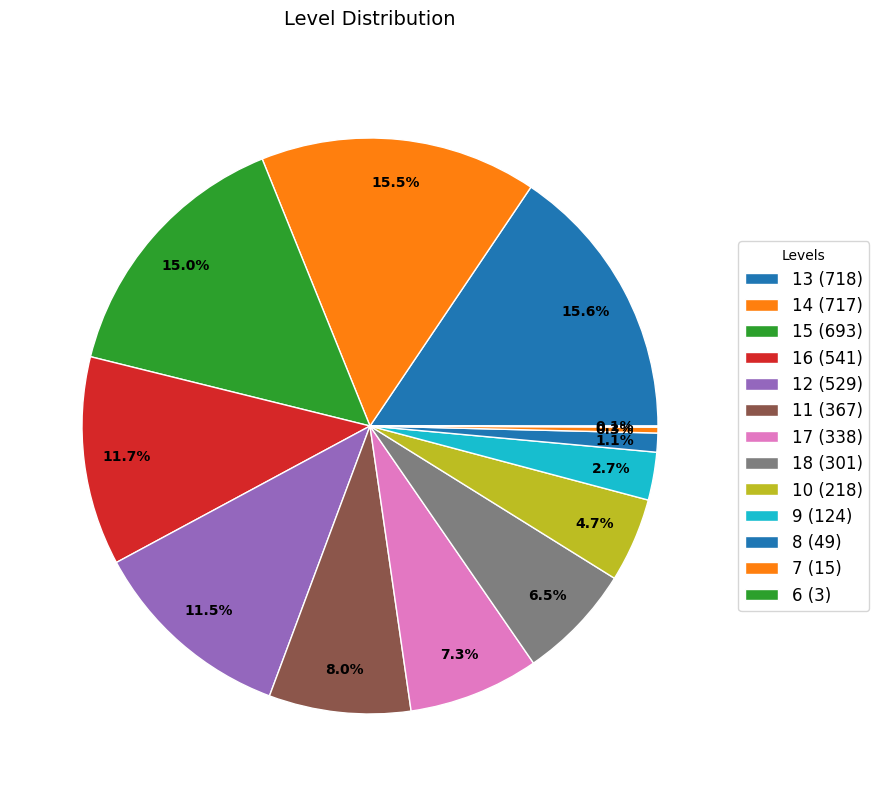

In [42]:
# Get value counts
details = df['level'].value_counts()

# Create figure with enough space
plt.figure(figsize=(12, 12))

# Create the pie chart
wedges, texts, autotexts = plt.pie(
    details,
    labels=None,  # Remove labels initially to prevent overlap
    autopct='%1.1f%%',
    pctdistance=0.85,  # Move percentages inside
    wedgeprops={'edgecolor': 'white', 'linewidth': 1},
    textprops={'fontsize': 10, 'color': 'black', 'weight': 'bold'}
)

# Add clean labels outside the pie
plt.legend(
    wedges,
    [f"{l} ({s})" for l, s in zip(details.index, details.values)],
    title="Levels",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=12
)

# Adjust layout to prevent clipping
plt.title('Level Distribution', pad=30, fontsize=14)
plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.7)  # Make space for legend

plt.show()

### Use box plox to see relation between `location` and `earned_damage`. (2 points)

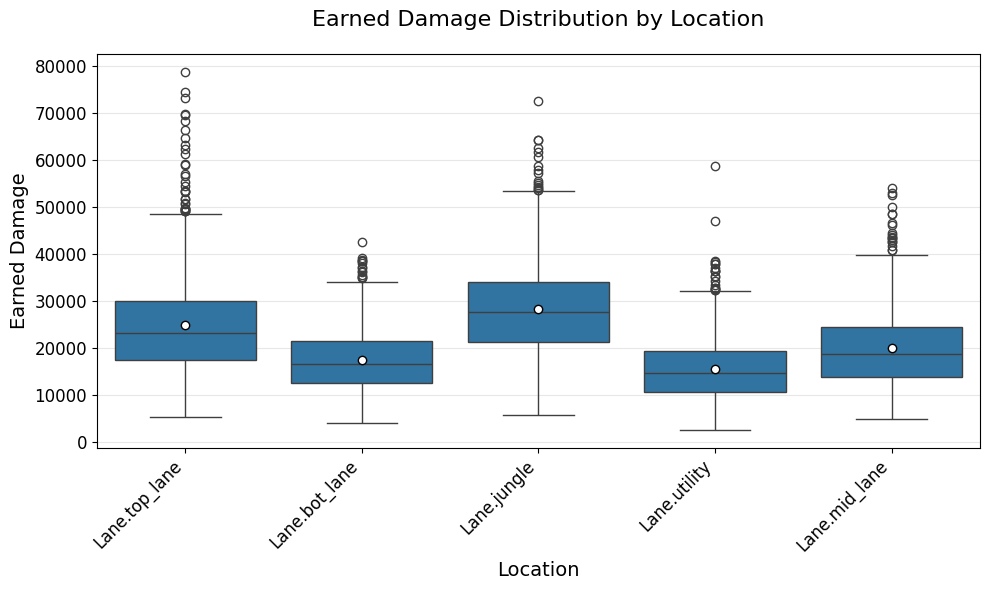

In [45]:
plt.figure(figsize=(10, 6))

# Create boxplot
sns.boxplot(
    data=df,
    x='location',
    y='earned_damage',
    showmeans=True,  # Show mean markers
    meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black'}
)

# Add plot decorations
plt.title('Earned Damage Distribution by Location', fontsize=16, pad=20)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Earned Damage', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add horizontal grid lines for better readability
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### Plot hist plot of `spell_used`. (2 points)

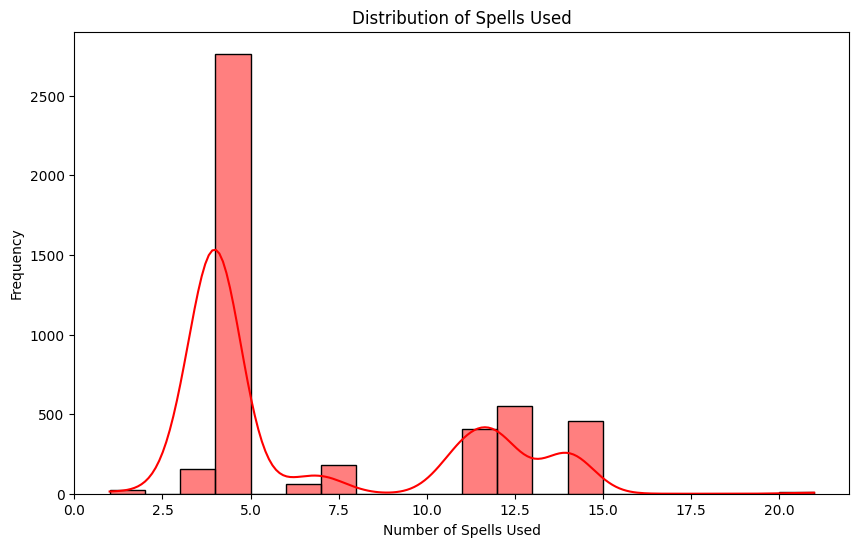

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(df['spell_used'], bins=20, kde=True, color='red')
plt.xlabel("Number of Spells Used")
plt.ylabel("Frequency")
plt.title("Distribution of Spells Used")
plt.show()


## Step2: Preprocessing of Data
To give the data to our model, first we have to apply some prerocessing fucntion on it to make it ready for model.

# Feature Selection
In data science, data often has many features. But not all of these features are necessarily helpful because some of them do not provide useful information. Therefore, we need methods that, according to the nature of the data, extract the necessary features so that we can use them to solve our problem.

## Question: (3 points)
Find and explain some of this feature selection techniques (e.g. mutual information).

## `Answer`
Feature selection techniques help identify the most relevant features in a dataset, reducing complexity and improving model performance. Here are a few commonly used methods:

1. Mutual Information: Measures the dependency between features and the target variable. Features with higher mutual information contribute more to predicting the target and are thus selected.

2. Variance Threshold: Removes features with low variance, as they provide little information. For example, features with the same value across most samples are not useful.

3. Correlation Coefficient: Identifies highly correlated features (with each other or the target). Highly correlated features may be redundant, so one of them can be removed.

4. Recursive Feature Elimination (RFE): A wrapper method that iteratively trains a model and removes the least important features based on the model's importance metrics.

5. Lasso (L1 Regularization): Shrinks the coefficients of less important features to zero, effectively excluding them from the model.

These methods simplify the dataset, enhance interpretability, and prevent overfitting.

### Drop the features which have low correlation with target varibale. (5 points)


In [52]:
import numpy as np
from scipy.stats import f_oneway, pointbiserialr

cols_to_remove = []
target = df['win_or_defeat']

for col in df.columns:
    if col == 'win_or_defeat':
        continue

    first_value = df[col].iloc[0]

    if isinstance(first_value, (int, np.integer)):  # Integer Feature
        correlation = df[col].corr(target)
        print(f"Pearson Correlation between {col} and win_or_defeat: {correlation}")
        if abs(correlation) < 0.015:
            cols_to_remove.append(col)

    elif isinstance(first_value, (float, np.floating)):  # Float Feature
        correlation = df[col].corr(target)
        print(f"Pearson Correlation between {col} and win_or_defeat: {correlation}")
        if abs(correlation) < 0.015:
            cols_to_remove.append(col)

    elif isinstance(first_value, str):  # Categorical Feature (Nominal)
        unique_categories = df[col].unique()
        if len(unique_categories) > 1:
            grouped = [df[df[col] == cat]['win_or_defeat'] for cat in unique_categories]
            f_stat, p_value = f_oneway(*grouped)
            print(f"ANOVA F-statistic for {col}: {f_stat}, P-value: {p_value}")
            if p_value > 0.8:
                cols_to_remove.append(col)
        else:
            cols_to_remove.append(col)  # Single-category columns are not informative

    elif isinstance(first_value, bool):  # Boolean Feature
        correlation, p_value = pointbiserialr(df[col].astype(int), target)
        print(f"Point Biserial Correlation between {col} and win_or_defeat: {correlation}, P-value: {p_value}")
        if abs(correlation) < 0.015:
            cols_to_remove.append(col)

    else:
        print(f"Skipping column {col} (unsupported data type: {type(first_value)})")

# Dropping low-correlation features
df.drop(columns=cols_to_remove, inplace=True)
print(f"Dropped columns: {cols_to_remove}")

df.head(10)


Pearson Correlation between Unnamed: 0 and win_or_defeat: 0.012904276631654922
Pearson Correlation between spell_used and win_or_defeat: -0.00033603075341224163
Pearson Correlation between trap_used and win_or_defeat: 0.016024961878500124
ANOVA F-statistic for character: 1.0285604155618706, P-value: 0.3892622704623759
ANOVA F-statistic for position: 0.22155017897151402, P-value: 0.637883554144148
ANOVA F-statistic for location: 1.3586962435725425, P-value: 0.24570336684220836
Pearson Correlation between assists and win_or_defeat: 0.3386730654051405
Pearson Correlation between damage_amount and win_or_defeat: 0.3537112448981546
Pearson Correlation between towers_damage and win_or_defeat: 0.30862723211584836
Pearson Correlation between rooms_damage and win_or_defeat: 0.3537112448981546
Pearson Correlation between deaths and win_or_defeat: -0.44239029028191384
Pearson Correlation between money_total and win_or_defeat: 0.2536449208637634
Pearson Correlation between kill_death_ratio and win

,trap_used,character,position,location,assists,damage_amount,towers_damage,rooms_damage,deaths,money_total,kill_death_ratio,kills_total,level,controlling_time,total_damage,earned_damage,special_enemy_killed,room_kills,main_score,win_or_defeat
0,12,TwistedFate,Side.blue,Lane.top_lane,9.0,1862,5119,1862,9,9152,1.222222,2,13,19,99079,25062,149,1,21,False
2,12,Ziggs,Side.blue,Lane.bot_lane,3.0,543,2754,543,4,9014,1.750000,4,12,11,106757,10049,168,0,11,False
3,7,Senna,Side.red,Lane.bot_lane,4.0,1547,1547,1547,6,8155,1.000000,2,12,14,53993,12480,129,1,11,False
5,11,Rengar,Side.red,Lane.jungle,7.0,1564,16053,1564,4,11536,3.500000,7,14,14,128646,40236,27,1,17,True
6,12,Ziggs,Side.blue,Lane.bot_lane,9.0,19665,20431,19665,3,10699,5.333333,7,12,11,123192,8057,140,4,9,True
7,14,Karma,Side.blue,Lane.utility,4.0,740,997,740,1,5469,5.000000,1,10,17,18138,3414,25,0,38,False
8,4,Zyra,Side.red,Lane.utility,8.0,0,123,0,10,7371,0.900000,1,12,49,32425,24632,30,0,91,False
9,12,Graves,Side.red,Lane.mid_lane,5.0,3277,3277,3277,5,9270,1.800000,4,12,19,109150,13704,162,1,15,False
10,4,Olaf,Side.blue,Lane.jungle,3.0,0,7063,0,10,8514,0.500000,2,13,12,106474,38614,19,0,29,False
11,12,Kled,Side.red,Lane.top_lane,3.0,3646,4463,3646,11,10220,0.636364,4,14,7,119522,41289,178,0,13,False


### Encode the labels (5 points)
Use sklearn LabelEncoder to encode the non-numerical columns. Cast the label column to numeric type.

In [55]:
from sklearn.preprocessing import LabelEncoder

# TODO: Encode categorical columns using LabelEncoder # 📣

# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Encode each categorical column
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Cast the 'win_or_defeat' column to integer type
df['win_or_defeat'] = df['win_or_defeat'].astype(int)

print("Categorical columns encoded successfully!")
df.head(10)


Categorical columns encoded successfully!


,trap_used,character,position,location,assists,damage_amount,towers_damage,rooms_damage,deaths,money_total,kill_death_ratio,kills_total,level,controlling_time,total_damage,earned_damage,special_enemy_killed,room_kills,main_score,win_or_defeat
0,12,129,0,3,9.0,1862,5119,1862,9,9152,1.222222,2,13,19,99079,25062,149,1,21,0
2,12,153,0,0,3.0,543,2754,543,4,9014,1.750000,4,12,11,106757,10049,168,0,11,0
3,7,105,1,0,4.0,1547,1547,1547,6,8155,1.000000,2,12,14,53993,12480,129,1,11,0
5,11,99,1,1,7.0,1564,16053,1564,4,11536,3.500000,7,14,14,128646,40236,27,1,17,1
6,12,153,0,0,9.0,19665,20431,19665,3,10699,5.333333,7,12,11,123192,8057,140,4,9,1
7,14,52,0,4,4.0,740,997,740,1,5469,5.000000,1,10,17,18138,3414,25,0,38,0
8,4,156,1,4,8.0,0,123,0,10,7371,0.900000,1,12,49,32425,24632,30,0,91,0
9,12,37,1,2,5.0,3277,3277,3277,5,9270,1.800000,4,12,19,109150,13704,162,1,15,0
10,4,86,0,1,3.0,0,7063,0,10,8514,0.500000,2,13,12,106474,38614,19,0,29,0
11,12,61,1,3,3.0,3646,4463,3646,11,10220,0.636364,4,14,7,119522,41289,178,0,13,0


### Normalize the dataset. (5 points)

In [56]:
# TODO: Normalize the dataset using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = numerical_cols.drop('win_or_defeat')
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head(10)

,trap_used,character,position,location,assists,damage_amount,towers_damage,rooms_damage,deaths,money_total,kill_death_ratio,kills_total,level,controlling_time,total_damage,earned_damage,special_enemy_killed,room_kills,main_score,win_or_defeat
0,0.827751,1.135156,-0.985152,0.731026,0.143811,-0.243388,-0.422104,-0.243388,1.079311,-0.493218,-0.631880,-0.857765,-0.348308,0.005235,-0.263822,0.363075,0.336919,-0.024765,-0.438784,0
2,0.827751,1.671426,-0.985152,-1.416887,-0.920181,-0.656293,-0.656259,-0.656293,-0.576446,-0.532949,-0.491786,-0.394431,-0.769585,-0.562991,-0.154760,-1.152349,0.563839,-0.786357,-0.917862,0
3,-0.331804,0.598886,1.015071,-1.416887,-0.742849,-0.341997,-0.775762,-0.341997,0.085857,-0.780259,-0.690867,-0.857765,-0.769585,-0.349906,-0.904240,-0.906962,0.098057,-0.024765,-0.917862,0
5,0.595840,0.464819,1.015071,-0.700916,-0.210853,-0.336675,0.660454,-0.336675,-0.576446,0.193147,-0.027264,0.300569,0.072968,-0.349906,0.156159,1.894751,-1.120144,-0.024765,-0.630415,1
6,0.827751,1.671426,-0.985152,-1.416887,0.143811,5.329738,1.093912,5.329738,-0.907597,-0.047830,0.459378,0.300569,-0.769585,-0.562991,0.078688,-1.353423,0.229431,2.260014,-1.013678,1
7,1.291572,-0.585377,-0.985152,1.446998,-0.742849,-0.594624,-0.830216,-0.594624,-1.569900,-1.553571,0.370898,-1.089432,-1.612137,-0.136821,-1.413538,-1.822091,-1.144031,-0.786357,0.375651,0
8,-1.027537,1.738460,1.015071,1.446998,-0.033521,-0.826276,-0.916750,-0.826276,1.410462,-1.005977,-0.717411,-1.089432,-0.769585,2.136084,-1.210600,0.319671,-1.084315,-0.786357,2.914769,0
9,0.827751,-0.920546,1.015071,0.015055,-0.565517,0.199570,-0.604477,0.199570,-0.245295,-0.459245,-0.478514,-0.394431,-0.769585,0.005235,-0.120769,-0.783410,0.492180,-0.024765,-0.726231,0
10,-1.027537,0.174339,-0.985152,-0.700916,-0.920181,-0.826276,-0.229632,-0.826276,1.410462,-0.676901,-0.823587,-0.857765,-0.348308,-0.491963,-0.158780,1.731025,-1.215690,-0.786357,-0.055520,0
11,0.827751,-0.384276,1.015071,0.731026,-0.920181,0.315083,-0.487053,0.315083,1.741614,-0.185736,-0.787391,-0.394431,0.072968,-0.847105,0.026558,2.001042,0.683271,-0.786357,-0.822047,0


# Step3: Linear Discriminant Analysis (LDA)


### Split data to train and test sets. (3 points)

In [62]:
from sklearn.model_selection import train_test_split

# Remove target variable to create feature matrix
df1 = df.drop(columns=['win_or_defeat'])

# Convert to numpy arrays
x = df1.values  # Feature matrix
y = df['win_or_defeat'].values  # Target variable

# Split dataset (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=42,  # For reproducibility
    stratify=y  # Preserves class distribution
)
print(f"Training set: x_train={x_train.shape}, y_train={y_train.shape}")
print(f"Testing set: x_test={x_test.shape}, y_test={y_test.shape}")

Training set: x_train=(3690, 19), y_train=(3690,)
Testing set: x_test=(923, 19), y_test=(923,)


### Implement LDA from scratch class. (15 points)

In [63]:
import numpy as np
from scipy.linalg import eigh

class CustomLDA:
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.weights = None
        self.bias = None
        self.dvecs = None

    def fit(self, X, y):
        # Get the number of samples and features
        n_samples, n_features = X.shape

        # Identify unique classes and their counts
        classes, cls_counts = np.unique(y, return_counts=True)
        self.classes_ = classes
        n_classes = len(classes)

        # Compute prior probabilities
        priors = cls_counts / n_samples

        # Compute class-wise means
        X_cls_mean = np.zeros((n_classes, n_features))
        for i, cls in enumerate(classes):
            X_cls_mean[i] = np.mean(X[y == cls], axis=0)

        # Compute global mean
        global_mean = np.mean(X, axis=0)

        # Compute between-class and within-class deviations
        between_cls_deviation = X_cls_mean - global_mean
        within_cls_deviation = X - X_cls_mean[y]

        # Compute scatter matrices
        Sb = np.zeros((n_features, n_features))
        Sw = np.zeros((n_features, n_features))

        for i in range(n_classes):
            # Between-class scatter
            Sb += cls_counts[i] * np.outer(between_cls_deviation[i], between_cls_deviation[i])

            # Within-class scatter
            cls_mask = (y == classes[i])
            Sw += np.dot(within_cls_deviation[cls_mask].T, within_cls_deviation[cls_mask])

        # Solve generalized eigenvalue problem
        evals, evecs = eigh(Sb, Sw)

        # Sort eigenvectors by descending eigenvalues
        sorted_idx = np.argsort(evals)[::-1]
        evals = evals[sorted_idx]
        evecs = evecs[:, sorted_idx]

        # Store discriminant vectors
        self.dvecs = evecs

        # Set number of components if not specified
        if self.n_components is None:
            self.n_components = min(n_classes - 1, n_features)

        # Compute weight matrix and bias term
        self.weights = evecs[:, :self.n_components]
        self.bias = -0.5 * np.diag(np.dot(np.dot(X_cls_mean, self.weights),
                                       np.dot(X_cls_mean, self.weights).T)) + np.log(priors)

    def transform(self, X):
        # Project data onto selected components
        return np.dot(X, self.weights)

    def predict(self, X_test):
        # Compute classification scores
        scores = np.dot(X_test, np.dot(self.weights, self.weights.T)) + self.bias

        # Assign to class with highest score
        return self.classes_[np.argmax(scores, axis=1)]

### Fit your custom LDA on data and test the model. Print the accuracy score. (5 points)

In [65]:
import numpy as np
from scipy.linalg import eigh
from sklearn.metrics import accuracy_score

class CustomLDA:
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.weights = None
        self.bias = None
        self.dvecs = None
        self.class_means_ = None
        self.priors_ = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        classes, cls_counts = np.unique(y, return_counts=True)
        self.classes_ = classes
        n_classes = len(classes)

        # Compute priors
        self.priors_ = cls_counts / n_samples

        # Compute class means
        self.class_means_ = np.zeros((n_classes, n_features))
        for i, cls in enumerate(classes):
            self.class_means_[i] = np.mean(X[y == cls], axis=0)

        # Compute within-class scatter
        Sw = np.zeros((n_features, n_features))
        for i, cls in enumerate(classes):
            cls_scatter = np.cov(X[y == cls], rowvar=False) * (cls_counts[i] - 1)
            Sw += cls_scatter

        # Compute between-class scatter
        overall_mean = np.mean(X, axis=0)
        Sb = np.zeros((n_features, n_features))
        for i, cls in enumerate(classes):
            diff = (self.class_means_[i] - overall_mean).reshape(-1, 1)
            Sb += cls_counts[i] * np.dot(diff, diff.T)

        # Solve eigenvalue problem
        evals, evecs = eigh(Sb, Sw)
        sorted_idx = np.argsort(evals)[::-1]
        self.dvecs = evecs[:, sorted_idx]

        if self.n_components is None:
            self.n_components = min(n_classes - 1, n_features)

        self.weights = self.dvecs[:, :self.n_components]

    def transform(self, X):
        return np.dot(X, self.weights)

    def predict(self, X):
        # Project data
        X_projected = self.transform(X)
        class_projected = self.transform(self.class_means_)

        # Compute distances to class means
        dists = []
        for i in range(len(self.classes_)):
            dist = np.sum((X_projected - class_projected[i])**2, axis=1)
            dists.append(dist)
        dists = np.array(dists)

        # Return class with minimum distance
        return self.classes_[np.argmin(dists, axis=0)]

# Initialize and fit
custom_lda = CustomLDA(n_components=1)
custom_lda.fit(x_train, y_train)

# Predict and evaluate
lda_pred_res = custom_lda.predict(x_test)
lda_accuracy = accuracy_score(y_test, lda_pred_res)

print(f'LDA accuracy: {lda_accuracy:.4f}')

LDA accuracy: 0.8451


### Now, use the sklearn LDA model and fit ot on data and print the results. (4 points)

In [66]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Initialize and fit sklearn LDA model
sk_lda = LinearDiscriminantAnalysis()
sk_lda.fit(x_train, y_train)

# Predict labels for test data
sk_lda_pred_res = sk_lda.predict(x_test)

# Transform training data (dimensionality reduction)
sk_transformed = sk_lda.transform(x_train)

# Compute accuracy score
sk_lda_accuracy = accuracy_score(y_test, sk_lda_pred_res)

print(f'sk LDA accuracy: {sk_lda_accuracy:.4f}')

sk LDA accuracy: 0.8440


### Plot the prediction of your LDA. (4 points)

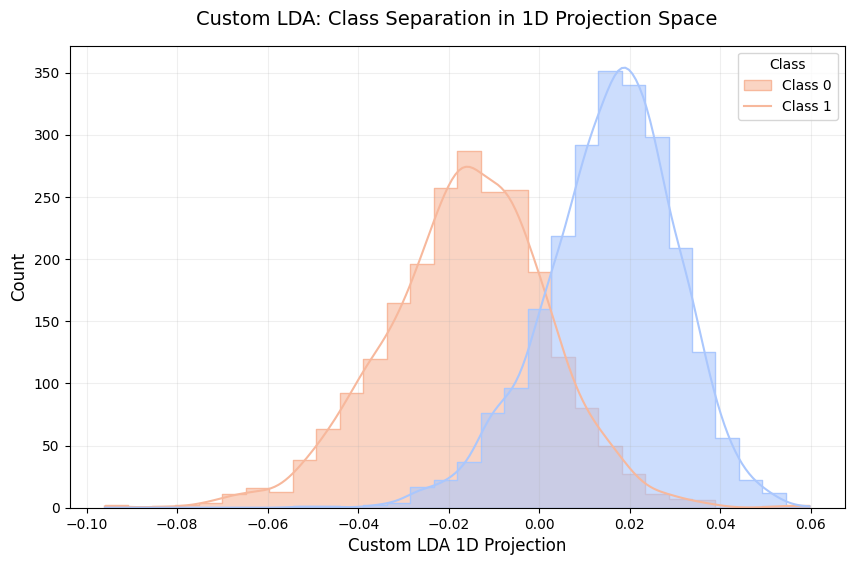

In [70]:
# Initialize and fit custom LDA with 1 component
custom_lda = CustomLDA(n_components=1)
custom_lda.fit(x_train, y_train)

# Transform the dataset
X_lda_custom = custom_lda.transform(np.vstack((x_train, x_test)))  # Transform both train and test
y_combined = np.concatenate((y_train, y_test))  # Combine labels

# Plot the LDA projection
plt.figure(figsize=(10, 6))
sns.histplot(x=X_lda_custom.flatten(),
             hue=y_combined,
             bins=30,
             kde=True,
             palette="coolwarm",
             alpha=0.6,
             element="step")

plt.xlabel("Custom LDA 1D Projection", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Custom LDA: Class Separation in 1D Projection Space", pad=15, fontsize=14)
plt.legend(title='Class', labels=['Class 0', 'Class 1'])  # Update with your actual class names
plt.grid(alpha=0.2)
plt.show()

### You can see the results are not accurate. Why this happend? When LDA is suitable to be used as a model for calssification task? (5 points)

LDA may perform poorly if:  
1. **Data is non-Gaussian** or has **different covariance** across classes.  
2. **Classes are non-linearly separable**.  
3. **Features are correlated** or **outliers** distort the model.  

**Use LDA when:**  
✔ Features are roughly **normally distributed**.  
✔ Classes share **similar covariance**.  
✔ The **decision boundary is linear**.  
✔ You need an **interpretable, lightweight model**.  



# Multicalss Classification (35 points)
In this part, you will use your LDA from scratch for multiclass classification task on starts dataset.

In [73]:
df = pd.read_csv('Stars.csv')
df.head(10)

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
5,2840,0.000650,0.1100,16.98,Red,M,0
6,2637,0.000730,0.1270,17.22,Red,M,0
7,2600,0.000400,0.0960,17.40,Red,M,0
8,2650,0.000690,0.1100,17.45,Red,M,0
9,2700,0.000180,0.1300,16.05,Red,M,0


## Preprocessing of Data

Do preprocessing on data (use Step2 methods). (4 points)

In [101]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Assuming df is your dataset
# TODO: Extract features (X) and target variable (y) from the dataset
X_df = df.drop(columns=['Type'])  # Replace 'target_column' with actual target column name
y_df = df['Type']

# TODO: Identify categorical features
cat_features_list = X_df.select_dtypes(include=['object']).columns.tolist()

# TODO: Encode categorical features using LabelEncoder
label_encoders = {}
for col in cat_features_list:
    le = LabelEncoder()
    X_df[col] = le.fit_transform(X_df[col])
    label_encoders[col] = le  # Store encoders in case we need to inverse transform later

# TODO: Normalize the 'Temperature' column
# TODO: Normalize the dataset using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = X_df.select_dtypes(include=['int64', 'float64']).columns
X_df[numerical_cols] = scaler.fit_transform(X_df[numerical_cols])
X_df.head(10)

print(X_df.head(40))
print(y_df.head(40))
# TODO: Convert features and target variable to numpy arrays
X = X_df.to_numpy()
y = y_df.to_numpy()


    Temperature         L         R       A_M     Color  Spectral_Class
0     -0.779382 -0.598624 -0.459210  1.116745  0.531788        0.595338
1     -0.782110 -0.598624 -0.459241  1.162414  0.531788        0.595338
2     -0.828477 -0.598624 -0.459342  1.362213  0.531788        0.595338
3     -0.807496 -0.598624 -0.459229  1.167171  0.531788        0.595338
4     -0.897819 -0.598624 -0.459340  1.491607  0.531788        0.595338
5     -0.803300 -0.598624 -0.459326  1.198568  0.531788        0.595338
6     -0.824596 -0.598624 -0.459293  1.221402  0.531788        0.595338
7     -0.828477 -0.598624 -0.459353  1.238528  0.531788        0.595338
8     -0.823232 -0.598624 -0.459326  1.243285  0.531788        0.595338
9     -0.817987 -0.598624 -0.459287  1.110085  0.531788        0.595338
10    -0.723573 -0.598624 -0.458551  0.600121  0.531788        0.595338
11    -0.772983 -0.598624 -0.458811  0.704778  0.531788        0.595338
12    -0.772458 -0.598624 -0.459160  0.839881  0.531788        0

### Split data to train and test sets.

In [104]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=142, stratify=y)


### Fit your custom LDA on data and test the model. Print the accuracy score. (4 points)

In [105]:
from sklearn.metrics import accuracy_score

# Initialize and fit Custom LDA (with n_classes-1 components)
custom_lda = CustomLDA(n_components=len(np.unique(y_train)) - 1)
custom_lda.fit(x_train, y_train)

# Predict on test data
lda_pred_res = custom_lda.predict(x_test)

# Transform training data for visualization
transformed = custom_lda.transform(x_train)

# Calculate accuracy
lda_accuracy = accuracy_score(y_test, lda_pred_res)

print(f'LDA accuracy: {lda_accuracy:.4f}')

LDA accuracy: 1.0000


### Feature Selection (7 points)
As you saw, using LDA on this data gives us 100 accuracy for classification task. Now, use the mutual information and RFE methods to select important features from first four features.

In [109]:
from sklearn.feature_selection import mutual_info_classif, RFE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Compute mutual information scores for the first four features
mi_scores = mutual_info_classif(X_df.iloc[:, :4], y_df)

# Create dictionary mapping feature names to their mutual information scores
mi_scores_dict = dict(zip(X_df.columns[:4], mi_scores))

# Perform Recursive Feature Elimination (RFE) with LDA
lda = LinearDiscriminantAnalysis()
rfe = RFE(estimator=lda, n_features_to_select=2)  # Select top 2 features
rfe.fit(X_df.iloc[:, :4], y_df)  # Fit on first four features

# Extract selected features with dtype=object
selected_features = X_df.columns[:4][rfe.support_].astype('object')

print("Selected Features:")
print(selected_features)
print("\nData type of selected_features:", type(selected_features))
print("Element dtype:", selected_features.dtype)

Selected Features:
Index(['R', 'A_M'], dtype='object')

Data type of selected_features: <class 'pandas.core.indexes.base.Index'>
Element dtype: object


### Now, to see how effective are these selected features, apply LDA on the data using these features and plot the bounderies. (10 points)

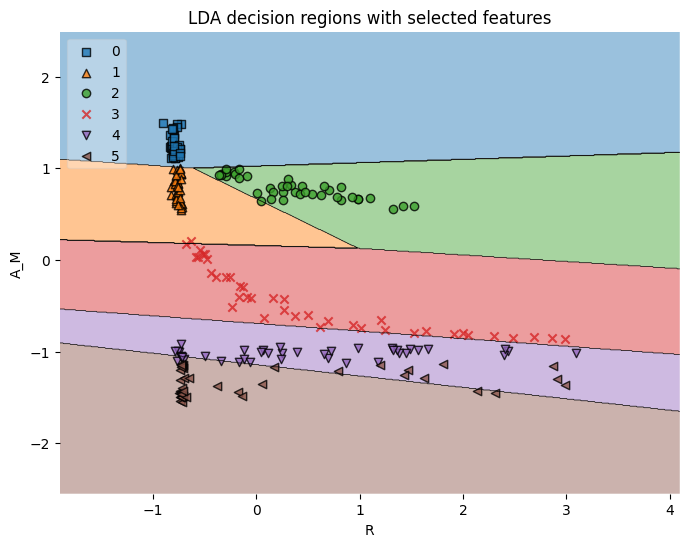

In [113]:
from mlxtend.plotting import plot_decision_regions

X_df_filtered = X_df.filter(items=["Temperature", "A_M"])

# TODO: Initialize and fit the LDA model
lda_model = CustomLDA()
X_inp = X_df_filtered.to_numpy()
y_inp = y_df.to_numpy()
lda_model.fit(X_inp, y_inp)

# TODO: Plot the decision regions for LDA # 📣

plt.figure(figsize=(8, 6))
plot_decision_regions(X_inp, y_inp, clf=lda_model, legend=2)

plt.xlabel("R")
plt.ylabel("A_M")
plt.title("LDA decision regions with selected features")
plt.show()